In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [23]:
# Descargamos los datos de MNIST (Números escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised = True, with_info = True)

In [24]:
# Separamos los datos de entrenamiento y prueba.
entrenamiento, prueba = datos['train'], datos['test']

In [25]:
# Normalizamos los datos pasando de 0 - 255 a 0 - 1
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # Aca pasamos de 0 - 255 a 0 - 1
  return imagenes, etiquetas

# Usamos la función para normalizar los datos de entrenamiento y prueba.
entrenamiento = entrenamiento.map(normalizar)
prueba = prueba.map(normalizar)

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


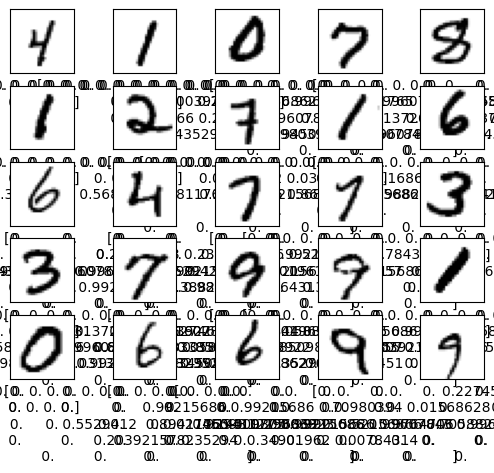

In [26]:
# Mostramos una imagen por categoría.
for i, (imagen, etiqueta) in enumerate(entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28, 28)) # reajustamos los píxeles.
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap = plt.cm.binary)
  plt.xlabel(imagen[etiqueta])
plt.show()

In [9]:
# Creamos un modelo (modelo denso, regular, sin redes convolucionales todavía).
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)), # 1 = Blanco y Negro
    tf.keras.layers.Dense(units = 50, activation = 'relu'),
    tf.keras.layers.Dense(units = 50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [10]:
modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [11]:
cantidad_train = metadatos.splits['train'].num_examples
cantidad_test = metadatos.splits['test'].num_examples
print('Cantidad de datos para entrenamiento:', cantidad_train)
print('Cantidad de datos para pruebas:', cantidad_test)

Cantidad de datos para entrenamiento: 60000
Cantidad de datos para pruebas: 10000


In [12]:
lote = 32

entrenamiento = entrenamiento.repeat().shuffle(cantidad_train).batch(lote)
prueba = prueba.batch(lote)

In [14]:
# Entrenamiento
import math

entrenar = modelo.fit(entrenamiento, epochs = 60,
                      steps_per_epoch = math.ceil(cantidad_train / lote))

Epoch 1/60
1875/1875 [==============================] - 15s 5ms/step - loss: 0.2850 - accuracy: 0.9173
Epoch 2/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1371 - accuracy: 0.9593
Epoch 3/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1045 - accuracy: 0.9679
Epoch 4/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0840 - accuracy: 0.9742
Epoch 5/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0718 - accuracy: 0.9779
Epoch 6/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0615 - accuracy: 0.9806
Epoch 7/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0516 - accuracy: 0.9832
Epoch 8/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0466 - accuracy: 0.9850
Epoch 9/60
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0419 - accuracy: 0.9864
Epoch 10/60
1875/1875 [==============================] - 12s 6ms/step - loss

De esta forma, al no ser una red neuronal convolucional, el modelo va a predecir correctamente sólo si el dato a predecir es muy similar a sus datos de entrenamiento. Supongamos que el dato a predecir lo tenemos que dibujar, si lo dibujamos en el centro es muy probable que el modelo prediga correctamente, pero si hacemos un dibujo chiquito del número, o lo dibujamos en una esquina, o no de centrada el modelo no va a predecir correctamente. Para esto la solución sería crear una red neuronal convolucional que se encargue de aprender características de los datos de entrenamiento y pueda identíficar mejor el dato de entrenamiento sea cúal sea su tamaño o posición.

In [ ]:
# Creemos una red neuronal convolucional.
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 es el tamaño de la matriz.

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 es el tamaño de la matriz.

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = 'relu' ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

lote = 32

entrenamiento = entrenamiento.repeat().shuffle(cantidad_train).batch(lote)
prueba = prueba.batch(lote)

entrenar = modelo.fit(entrenamiento, epochs = 60,
                      steps_per_epoch = math.ceil(cantidad_train / lote))

Epoch 1/60
1875/1875 [==============================] - 62s 30ms/step - loss: 0.1274 - accuracy: 0.9611
Epoch 2/60
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0416 - accuracy: 0.9876
Epoch 3/60
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0284 - accuracy: 0.9908
Epoch 4/60
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 5/60
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 6/60
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 7/60
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0092 - accuracy: 0.9973
Epoch 8/60
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 9/60
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 10/60
1875/1875 [==============================] - 72s 38m

Esta red neuronal convolucional va a seguir fallando al intentar más tamaños y más posiciones, pero a esta red neuronal convolucional vamos a agregarle la técnica de 'DROPOUT' esto hace que durante el entrenamiento, en cada una de las épocas, las neuronas van a tener una probabilidad de desactivarse temporalmente, esto se usa ya que después del entrenamiento al ver los pesos de las redes algunos son muy grandes y otros muy chicos por lo que casi no estan siendo usados y no tienen mucha influencia en la decisión de la red. Al agregar DROPOUT hace que las neuronas se apaguen aleatoriamente en cada época del entrenamiento y permite que diferentes conjuntos de neuronas contribuyan en cada iteración.

En el siguiente ejemplo creamos la misma red neuronal convolucional que hicimos arriba pero con esta técnica.

In [ ]:
# Creemos una red neuronal convolucional.
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 es el tamaño de la matriz.

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), # 2x2 es el tamaño de la matriz.

    # Las neuronas van a tener un 50% de probabilidad de apagarse en cada época
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = 'relu' ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

lote = 32

entrenamiento = entrenamiento.repeat().shuffle(cantidad_train).batch(lote)
prueba = prueba.batch(lote)

entrenar = modelo.fit(entrenamiento, epochs = 60,
                      steps_per_epoch = math.ceil(cantidad_train / lote))

De esta forma, va a predecir aún mejor de lo que lo hacía anteriormente pero no siempre va a ser exacto, eso queda en cuestión de modificar los parametros. Una muy buena opción sería aumentar el número de épocas.